**What is the problem?**

Understand global cyber-attack patterns and assess risk levels across 225 countries over a 14‑month period.




**How will you understand the problem?**

Through data exploration, cleaning (date conversion, missing value handling, and standardizing country names), feature engineering (e.g., extracting month and computing a composite risk score), and correlation analysis with visualizations.



**Business Questions**

**1.** Which countries are experiencing the highest levels of cyber-attacks?


**2.** How do cyber-attack patterns change over time?


**3.** Is there a correlation between different types of attacks?


**4.** What are the most prevalent types of cyber-attacks globally?


**5.** How do specific attack types vary among the most affected countries?


**Importing Libariers**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Collection**

Reading the Dataset - 'https://raw.githubusercontent.com/DrSufi/CyberData/main/cyber_data.csv'

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/DrSufi/CyberData/main/cyber_data.csv')
df.head()

,AttackDate,Country,Spam,Ransomware,Local Infection,Exploit,Malicious Mail,Network Attack,On Demand Scan,Web Threat,Rank Spam,Rank Ransomware,Rank Local Infection,Rank Exploit,Rank Malicious Mail,Rank Network Attack,Rank On Demand Scan,Rank Web Threat
0,11/10/2022 0:00,Arab Republic of Egypt,0.00090,0.00013,0.01353,0.00013,0.00287,0.01007,0.01148,0.01708,68,47,85,176,34,11,78,53
1,11/10/2022 0:00,Argentine Republic,0.00601,0.00006,0.00575,0.00035,0.00058,0.00095,0.00482,0.00974,27,86,174,128,140,138,174,160
2,11/10/2022 0:00,Aruba,NaN,NaN,0.01384,NaN,0.00092,NaN,0.00830,0.00554,162,143,82,186,104,187,119,190
3,11/10/2022 0:00,Bailiwick of Guernsey,NaN,NaN,0.00546,0.00273,NaN,0.00091,0.00546,0.01001,162,143,179,1,186,141,164,159
4,11/10/2022 0:00,Bailiwick of Jersey,0.00003,NaN,0.00774,0.00101,0.00067,NaN,0.00707,0.01145,138,143,150,31,133,187,137,146


Checking the info of Dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77623 entries, 0 to 77622
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AttackDate            77623 non-null  object 
 1   Country               77623 non-null  object 
 2   Spam                  62982 non-null  float64
 3   Ransomware            52144 non-null  float64
 4   Local Infection       74469 non-null  float64
 5   Exploit               64264 non-null  float64
 6   Malicious Mail        69184 non-null  float64
 7   Network Attack        71532 non-null  float64
 8   On Demand Scan        74231 non-null  float64
 9   Web Threat            73892 non-null  float64
 10  Rank Spam             77623 non-null  int64  
 11  Rank Ransomware       77623 non-null  int64  
 12  Rank Local Infection  77623 non-null  int64  
 13  Rank Exploit          77623 non-null  int64  
 14  Rank Malicious Mail   77623 non-null  int64  
 15  Rank Network Attack

Checking the shape of a Dataset

In [48]:
df.shape

(77623, 18)

Checking the Type of a Dataset

In [49]:
df.dtypes

,0
AttackDate,object
Country,object
Spam,float64
Ransomware,float64
Local Infection,float64
Exploit,float64
Malicious Mail,float64
Network Attack,float64
On Demand Scan,float64
Web Threat,float64


Checking the Null Values

In [55]:
df.isnull().sum().value_counts()

,count
0,18


Checking the duplicate values

In [56]:
df.duplicated().value_counts()

,count
False,31151


Describing the DataFrame

In [57]:
df.describe()

,AttackDate,Spam,Ransomware,Local Infection,Exploit,Malicious Mail,Network Attack,On Demand Scan,Web Threat,Rank Spam,Rank Ransomware,Rank Local Infection,Rank Exploit,Rank Malicious Mail,Rank Network Attack,Rank On Demand Scan,Rank Web Threat
count,31151,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000,31151.000000
mean,2023-04-28 10:29:30.703990272,0.005066,0.000113,0.013445,0.000456,0.001274,0.002164,0.009927,0.013051,95.339411,86.130108,98.367532,93.358383,97.964560,98.305993,98.303136,97.751886
min,2022-01-11 00:00:00,0.000010,0.000010,0.000300,0.000010,0.000010,0.000020,0.000260,0.000270,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2023-02-05 00:00:00,0.000140,0.000050,0.007320,0.000240,0.000360,0.000750,0.005420,0.009940,49.000000,44.000000,48.000000,43.000000,50.000000,49.000000,48.000000,47.000000
50%,2023-06-01 00:00:00,0.000600,0.000070,0.010930,0.000390,0.000760,0.001300,0.008370,0.012590,99.000000,90.000000,98.000000,94.000000,99.000000,99.000000,98.000000,98.000000
75%,2023-09-06 00:00:00,0.002530,0.000100,0.017625,0.000570,0.001570,0.002210,0.013010,0.015835,145.000000,133.000000,149.000000,145.000000,148.000000,149.000000,149.000000,148.000000
max,2023-12-11 00:00:00,0.294680,0.009180,0.049370,0.004650,0.032470,0.058260,0.038130,0.040130,181.000000,158.000000,196.000000,188.000000,193.000000,191.000000,196.000000,196.000000
std,NaN,0.021692,0.000157,0.008391,0.000340,0.001552,0.002926,0.006034,0.004838,52.902304,48.206104,57.881453,57.724229,55.458207,56.772557,57.876641,58.226106


**Data cleaning**

Date Conversion

In [58]:
df['AttackDate'] = pd.to_datetime(df['AttackDate'], errors='coerce')
df = df.dropna(subset=['AttackDate'])


Handling Missing Values

In [60]:
numeric_cols = ['Spam', 'Ransomware', 'Local Infection', 'Exploit',
                'Malicious Mail', 'Network Attack', 'On Demand Scan', 'Web Threat']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


Standardizing Country Names

In [61]:
df['Country'] = df['Country'].str.strip().str.title()

**Feature Engineering**

In [62]:
df['Month'] = df['AttackDate'].dt.to_period('M')
df['Composite_Risk'] = df[numeric_cols].mean(axis=1)

**Exploratory Data Analysis (EDA) & Visualization**

**Business Question 1**: Which countries are experiencing the highest levels of cyber-attacks?


In [64]:
country_risk = df.groupby('Country')['Composite_Risk'].mean().sort_values(ascending=False)
df.head()

,AttackDate,Country,Spam,Ransomware,Local Infection,Exploit,Malicious Mail,Network Attack,On Demand Scan,Web Threat,Rank Spam,Rank Ransomware,Rank Local Infection,Rank Exploit,Rank Malicious Mail,Rank Network Attack,Rank On Demand Scan,Rank Web Threat,Month,Composite_Risk
0,2022-11-10,Arab Republic Of Egypt,0.00090,0.00013,0.01353,0.00013,0.00287,0.01007,0.01148,0.01708,68,47,85,176,34,11,78,53,2022-11,0.007024
1,2022-11-10,Argentine Republic,0.00601,0.00006,0.00575,0.00035,0.00058,0.00095,0.00482,0.00974,27,86,174,128,140,138,174,160,2022-11,0.003533
2,2022-11-10,Aruba,0.00060,0.00007,0.01384,0.00039,0.00092,0.00130,0.00830,0.00554,162,143,82,186,104,187,119,190,2022-11,0.003870
3,2022-11-10,Bailiwick Of Guernsey,0.00060,0.00007,0.00546,0.00273,0.00076,0.00091,0.00546,0.01001,162,143,179,1,186,141,164,159,2022-11,0.003250
4,2022-11-10,Bailiwick Of Jersey,0.00003,0.00007,0.00774,0.00101,0.00067,0.00130,0.00707,0.01145,138,143,150,31,133,187,137,146,2022-11,0.003667


<ipython-input-65-eb184744d414>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_risk.values, y=country_risk.index, palette='viridis')


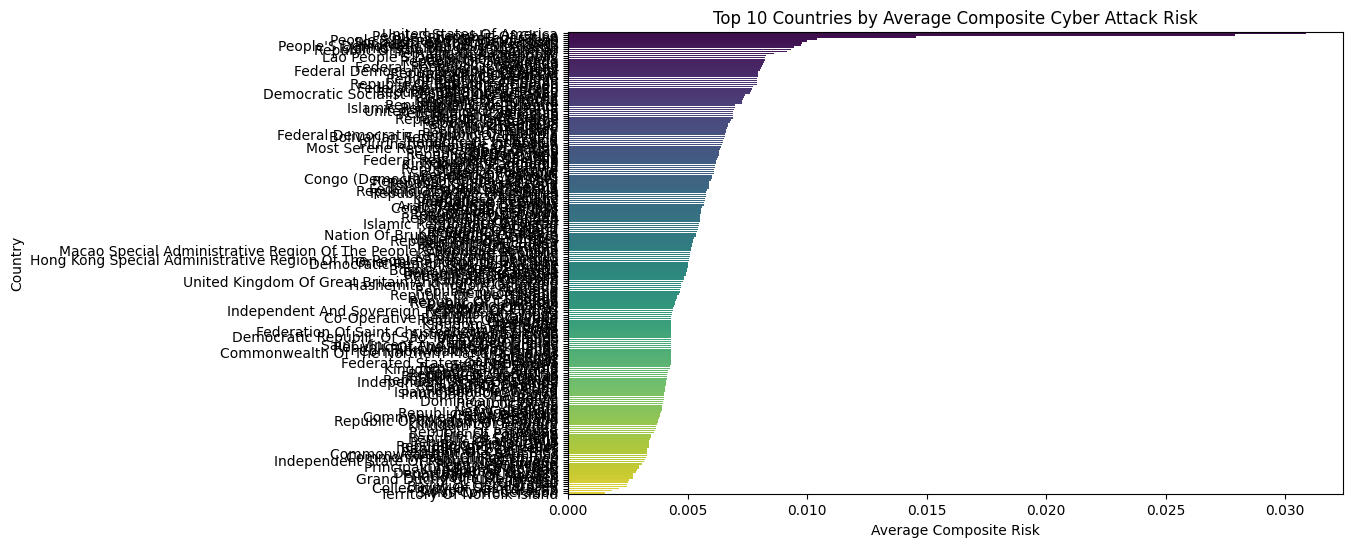

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_risk.values, y=country_risk.index, palette='viridis')
plt.title('Top 10 Countries by Average Composite Cyber Attack Risk')
plt.xlabel('Average Composite Risk')
plt.ylabel('Country')
plt.show()

**Business Question 2**: How do cyber-attack patterns change over time?

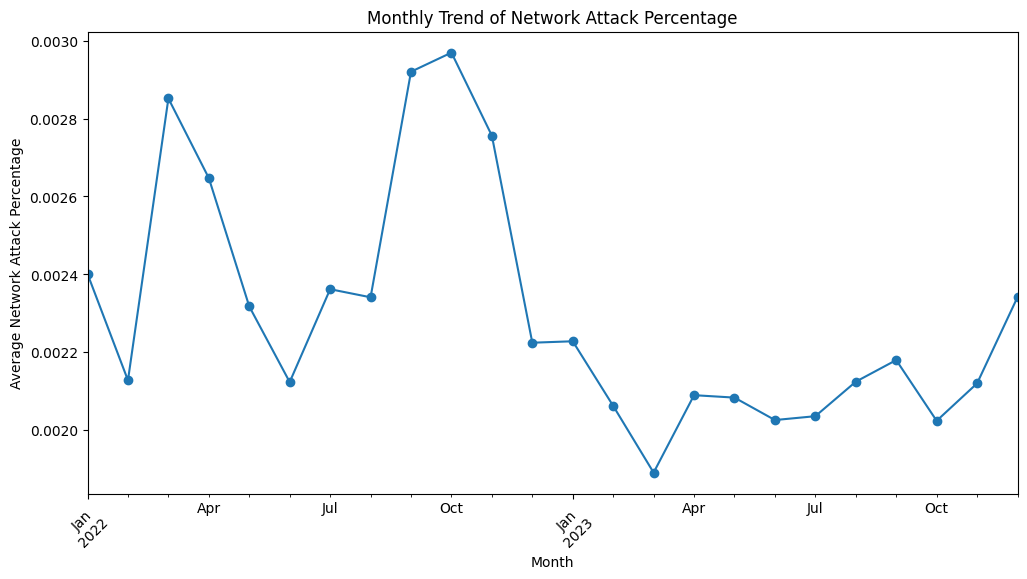

In [66]:
plt.figure(figsize=(12,6))
monthly_avg = df.groupby('Month')['Network Attack'].mean()
monthly_avg.plot(marker='o')
plt.title('Monthly Trend of Network Attack Percentage')
plt.xlabel('Month')
plt.ylabel('Average Network Attack Percentage')
plt.xticks(rotation=45)
plt.show()

**Business Question 3**: Is there a correlation between different types of attacks?

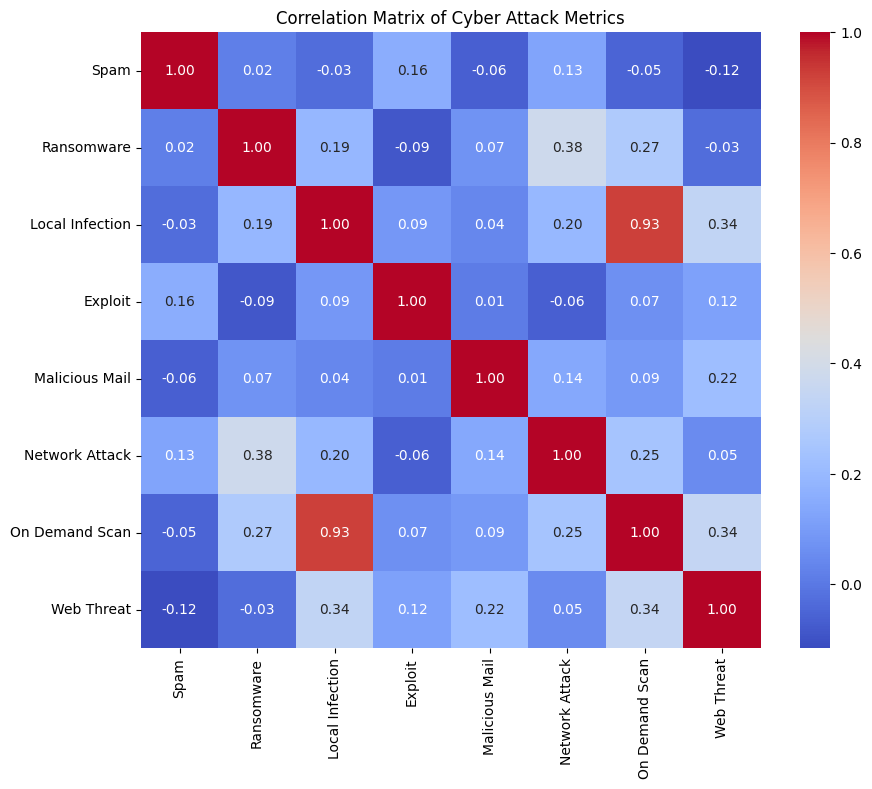

In [67]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Cyber Attack Metrics')
plt.show()

**Business Question 4**: What are the most prevalent types of cyber-attacks globally?

<ipython-input-68-8c964bcc0121>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=global_avg.values, y=global_avg.index, palette='magma')


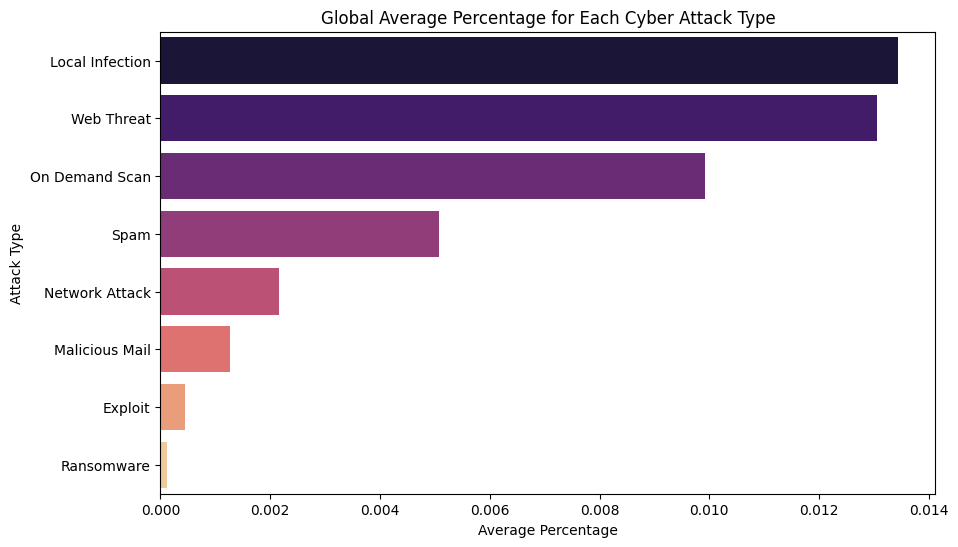

In [68]:
global_avg = df[numeric_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=global_avg.values, y=global_avg.index, palette='magma')
plt.title('Global Average Percentage for Each Cyber Attack Type')
plt.xlabel('Average Percentage')
plt.ylabel('Attack Type')
plt.show()

**Business Question 5**: How do specific attack types vary among the most affected countries?

<ipython-input-69-f4c0b36e260a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Ransomware', data=df[df['Country'].isin(top_countries)], palette='Set2')


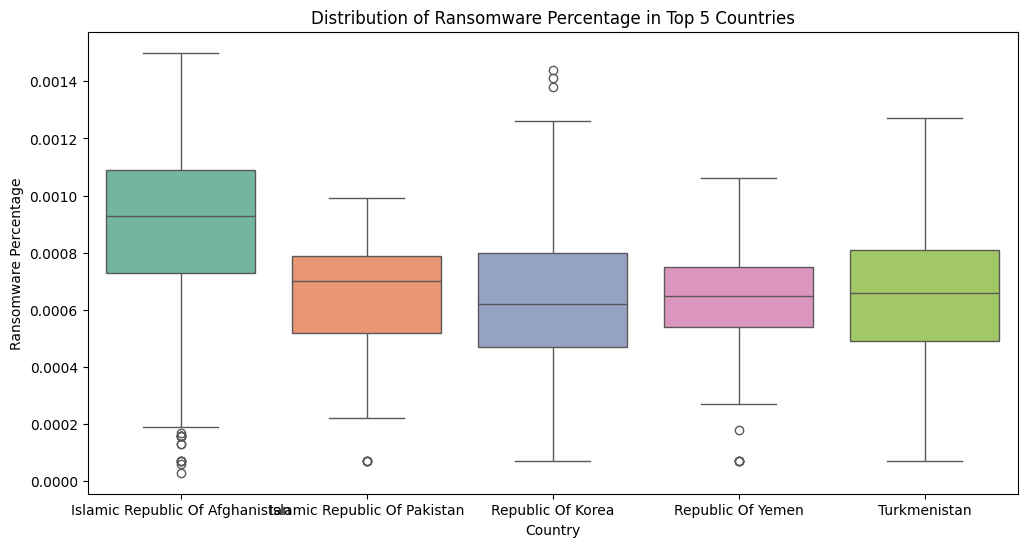

In [69]:
country_ransom = df.groupby('Country')['Ransomware'].mean().sort_values(ascending=False).head(5)
top_countries = country_ransom.index.tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Ransomware', data=df[df['Country'].isin(top_countries)], palette='Set2')
plt.title('Distribution of Ransomware Percentage in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Ransomware Percentage')
plt.show()

**Conclusion**

**Data Cleaning:**
We converted dates, handled missing values, and standardized country names to ensure data quality.

**Feature Engineering:**
Creating new features like the month of the attack and a composite risk score helps in summarizing and analyzing the data more effectively.

**EDA & Visualization:**
Our analysis addressed key business questions:

Identifying top countries by cyber-attack risk.

Analyzing temporal trends in attack patterns.

Understanding the correlations among various attack types.

Determining which types of attacks are most prevalent globally.

Comparing the variation of specific attack types (e.g., ransomware) among high-risk countries.